# OpenCV

OpenCV (https://pypi.org/project/opencv-python/, https://opencv.org) to jedna z najpopularniejszych bibliotek do przetwarzania oraz rozpoznawania obrazów. Została stworzona w laboratoriach Intela oraz pierwotnie opublikowana w 2011 roku. Jej rdzeń został stworzony w języku C++ (cammel-case w nazwach metod), natomiast obecnie dostępne są oficjalne porty dla języków Python oraz Java. W ramach otwartych projektów można trafić na nieoficjalne porty dla języków Kotlin, Dart, Objective-C oraz Swift co wynika z dostępności biblioteki dla platform mobilnych.

## Instalacja

In [1]:
pip install opencv-python

## Wykorzystanie biblioteki

Aby móc sprawnie korzystać z biblioteki OpenCV, należy ją zaimportować.

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Sprawdzenie wersji

Wersja instalacji OpenCV zaszyta jest w magicznym obiekcie \_\_version\_\_

In [4]:
cv2.__version__

'4.7.0'

## Wczytanie obrazu

Do wczytywania obrazu przeznaczona jest funkcja **imread**, która przyjmuje ścieżkę do pliku z obrazem oraz stałą reprezentującą tryb wczytania obrazu. Wynikiem funkcji imread jest tensor NumPy, który zawiera obraz w modelu barw **BGR** (odwrócone RGB), co należy mieć a uwadze!

In [5]:
img_color = cv2.imread('mauritius.jpeg', cv2.IMREAD_COLOR)

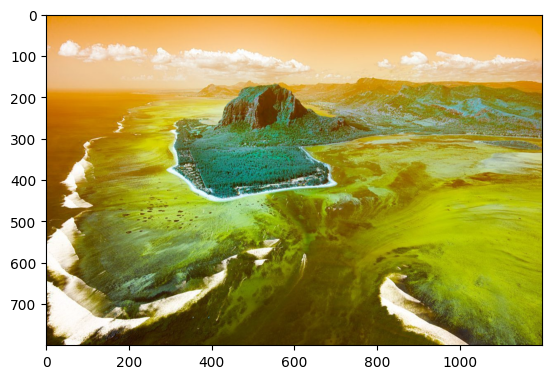

In [6]:
plt.imshow(img_color)

In [7]:
type(img_color)

numpy.ndarray

In [8]:
img_color.shape

(800, 1200, 3)

In [9]:
img_grayscale = cv2.imread('mauritius.jpeg', cv2.IMREAD_GRAYSCALE)

In [10]:
img_grayscale.shape

(800, 1200)

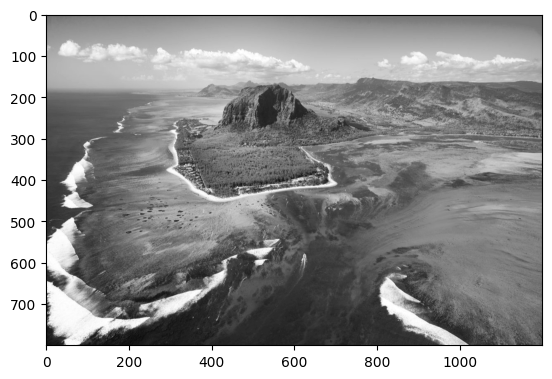

In [11]:
plt.imshow(img_grayscale, cmap='gray')

Stała IMREAD_UNCHANGED reprezentuje opcję wczytywania obrazów zawierających kanał alpha.

In [12]:
img_with_alpha = cv2.imread('mauritius.jpeg', cv2.IMREAD_UNCHANGED)

In [13]:
img_with_alpha.shape

(800, 1200, 3)

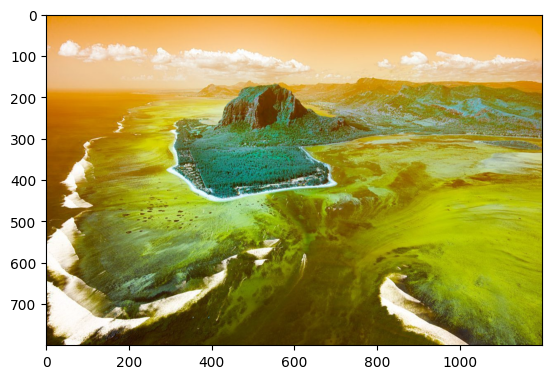

In [14]:
plt.imshow(img_with_alpha)

## Konwersja między modelami barw

Biblioteka OpenCV udostępnia łatwy (jednolinijkowy, bez porównania z własną implementacją), lecz także toporny interfejs do konwersji modeli barw w obrazach. Służy do tego funkcja **cvtColor**, która przyjmuje wczytany obraz (tensor NumPy) oraz stałą reprezentującą oryginalny i docelowy model barw.

Poniższy przykładowy kod dokonuje konwersji z modelu BGR (wewnętrznego dla OpenCV) do RGB.

In [15]:
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

Inne stałe reprezentujące popularne konwersję z modelu barw BGR:
- COLOR_BGR2GRAY
- COLOR_BGR2XYZ
- COLOR_BGR2HSV
- COLOR_BGR2Lab
- COLOR_BGR2Luv
- COLOR_BGR2HLS
- COLOR_BGR2YUV

Pełna lista jest dostępna w dokumentacji: https://docs.opencv.org/4.7.0/d8/d01/group__imgproc__color__conversions.html

## Progowanie

Biblioteka OpenCV udostępnia interfejs umożliwiający dokonanie binaryzacji trzema metodami:
- globalne - zaimplementowane w ramach lab7
- Otsu - metoda progowania globalnego z automatycznym doborem wartości progu na podstawie rozkładu barw obrazu
- adaptacyjne - metoda progująca lokalne obszary całego obrazu na podstawie lokalnie dobranych wartości progowych

Do przeprowadzenia operacji progowania w OpenCV służy funkcja threshold (metoda Otsu) lub adaptiveThreshold (progowanie adaptacyjne)

### Implementacja progowania metodą Otsu

In [16]:
lena_gray = cv2.imread('../data/lena.jpg', cv2.IMREAD_GRAYSCALE)

In [17]:
_, thresh_otsu = cv2.threshold(
    lena_gray,
    thresh=0,
    maxval=255,
    type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

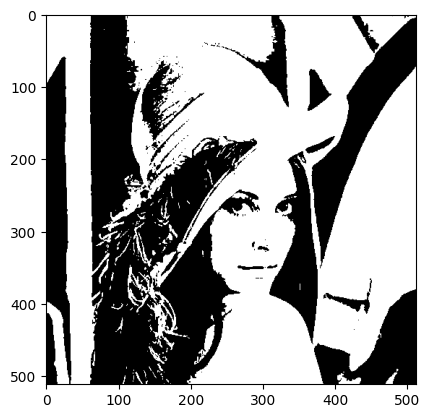

In [18]:
plt.imshow(thresh_otsu, cmap='gray')

### Implementacja progowania metodą adaptacyjną

- adaptiveMethod - parametr stałej określającej metodę wyznaczania lokalnych progów
    - ADAPTIVE_THRESH_MEAN_C - wyznaczanie progu na podstawie średniej wartości sąsiednich pikseli
    - ADAPTIVE_THRESH_GAUSSIAN_C - wyznaczanie progu na podstawie sumy ważonej sąsiednich pikseli, gdzie wagi pochodzą z rozkładu gaussowskiego
- thresholdType - metoda binaryzacji
- blockSize - wielkośc obszaru sąsiedztwa
- C - stała odejmowana od obliczonej średniej arytmetycznej lub ważonej

In [19]:
th_adaptive = cv2.adaptiveThreshold(
    lena_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=13,
    C=8
)

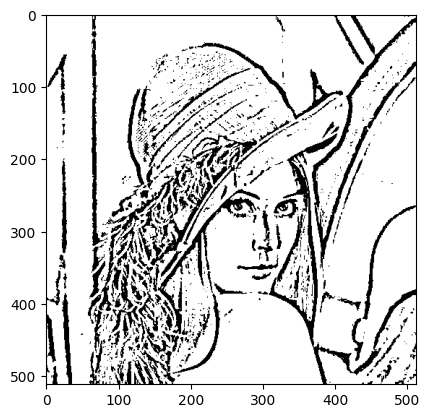

In [20]:
plt.imshow(th_adaptive, cmap='gray')

## Detekcja krawędzi metodą Canny'ego

Metoda Canny'ego jest rozwinięciem operatora Sobela. Działanie jej polega na wykonaniu nastepujących kroków:
1. wygładzanie obrazu filtrem gaussowskim
2. wyznaczanie gradientów operatorem Sobela
3. zachowanie gradientów które mają odpowiednio dużą wartość w stosunku do otoczenia
4. łączenie i progowanie krawędzi

Do wykrycia krawędzi metodą Canny'ego w bibliotece OpenCV służy funkcja Canny, która przyjmuje dwa argumenty numeryczne stanowiące progi histerezy oraz jeden argument stanowiący wielkośc filtra gaussowskiego

In [21]:
canny_edges = cv2.Canny(
      lena_gray,
      16,  # prog histerezy 1
      40,  # prog histerezy 2
      3  # wielkoscc filtra sobela
)

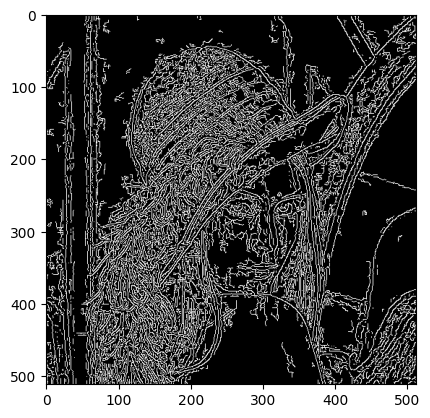

In [22]:
plt.imshow(canny_edges, cmap='gray')

## Wyrównanie histogramu metodą CLAHE

Metoda CLAHE polega adaptywnym na ograniczaniu wysokich wartości na histogramie. Po dokonaniu operacji wyrównana zostaje redystrybucja krańcowych wartości pikseli po całym obszarze obrazu. Metoda CLAHE znacząco obniża również liczebnośc pikseli o wartościach granicznych.

W celu zastosowania implementacji metody CLAHE należy użyć funkcji **createCLAHE** będącej konstruktorem zwracającym obiekt dokonujący adaptacji histogramu. Następnie, na zwróconym obiekcie należy wywołać metodę apply, do której zostanie przekazany obraz wejściowy.

Funkcja createCLAHE przyjmuje dwa parametry:
- clipLimit - wartość progu do limitowania kontrastu (wielkość odstawania barwy do zredukowania)
- tileGridSize - wielkość pojedynczych fragmentów, w ktorych wyrownywany jest histogram (wielkosc sasiedztwa ekstremów na histogramie)


In [23]:
lake_color = cv2.imread('swiecajty.jpg', cv2.IMREAD_COLOR)
lake_gray = cv2.cvtColor(lake_color, cv2.COLOR_BGR2GRAY)

In [24]:
clahe = cv2.createCLAHE(
    clipLimit=2.0,
    tileGridSize=(4, 4)
)
equalized_lake_gray = clahe.apply(lake_gray)

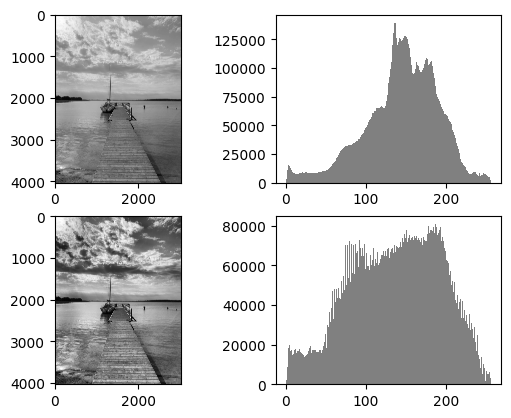

In [25]:
plt.subplot(221)
plt.imshow(lake_gray, cmap='gray')

plt.subplot(222)
plt.hist(lake_gray.ravel(), bins=256, range=(0, 256), color='gray')

plt.subplot(223)
plt.imshow(equalized_lake_gray, cmap='gray')

plt.subplot(224)
plt.hist(equalized_lake_gray.ravel(), bins=256, range=(0, 256), color='gray')

plt.show()

### Korekcja histogramu w obrazach kolorowych

Jednym z najczęstszych podejść w korekcji histogramu obrazu kolorowego jest konwersja do przestrzeni L*a*b, a nastepnie dokonanie metody CLAHE jedynie na warstwie L reprezentującej jasność

In [26]:
lake_rgb = cv2.cvtColor(lake_color, cv2.COLOR_BGR2RGB)
lake_lab = cv2.cvtColor(lake_color, cv2.COLOR_BGR2LAB)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
lake_lab[..., 0] = clahe.apply(lake_lab[..., 0])
lake_color_equalized = cv2.cvtColor(lake_lab, cv2.COLOR_LAB2RGB)

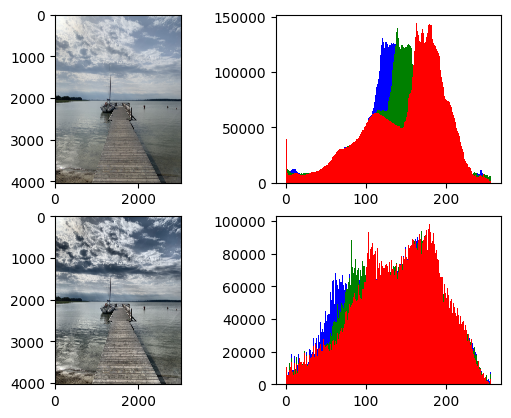

In [27]:
plt.subplot(221)
plt.imshow(lake_rgb)

plt.subplot(222)
plt.hist(lake_rgb[..., 0].ravel(), bins=256, range=(0, 256), color='b')
plt.hist(lake_rgb[..., 1].ravel(), bins=256, range=(0, 256), color='g')
plt.hist(lake_rgb[..., 2].ravel(), bins=256, range=(0, 256), color='r')

plt.subplot(223)
plt.imshow(lake_color_equalized)

plt.subplot(224)
plt.hist(lake_color_equalized[..., 0].ravel(), bins=256, range=(0, 256), color='b')
plt.hist(lake_color_equalized[..., 1].ravel(), bins=256, range=(0, 256), color='g')
plt.hist(lake_color_equalized[..., 2].ravel(), bins=256, range=(0, 256), color='r')

plt.show()

## Transformaty Hougha

Transformata Hougha - metoda wykrywania obiektów w wizji komputerowej. Jest szczególnym przypadkiem transformaty Radona znanej od 1917 roku. Oryginalna metoda Hougha służy do wykrywania prostych, natomiast jej modyfikacje umozliwiają detekcję również innych kształtów.

### Detekcja prostych

W OpenCV istnieją dwie funkcje przeznaczone do detekcji prostych za pomocą transformaty Hougha:
- HoughLines - wersja deterministyczna
- HoughLinesP - wersja stochastyczna, zoptymalizowana pod kątem wydajności obliczeń

Obie funkcje mają bardzo podobne interfejsy i przyjmują następujące parametry:
- rho - 1 rozdzielczość kontenerów na linie
- theta - kąt stanowiący odstęp przy badaniu prostych
- threshold - próg liczby głosów poniżej którego wykryte linie są odrzucane


In [28]:
lines_img = cv2.imread('lines.jpg', cv2.IMREAD_GRAYSCALE)

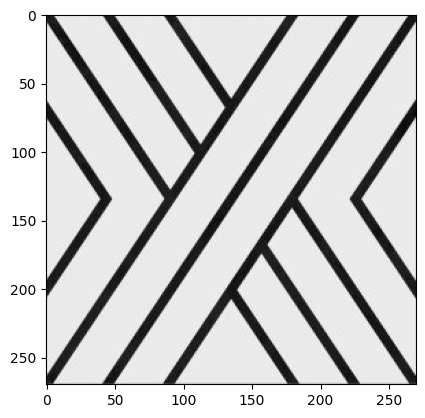

In [29]:
plt.imshow(lines_img, cmap='gray')

In [30]:
_, lines_thresh = cv2.threshold(
    lines_img,
    thresh=0,
    maxval=255,
    type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

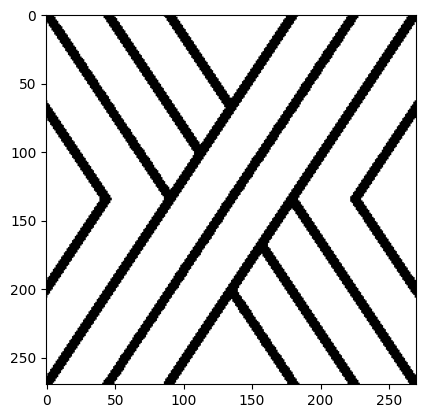

In [31]:
plt.imshow(lines_thresh, cmap='gray')

In [32]:
lines_edges = cv2.Canny(lines_thresh, 20, 50, 3)

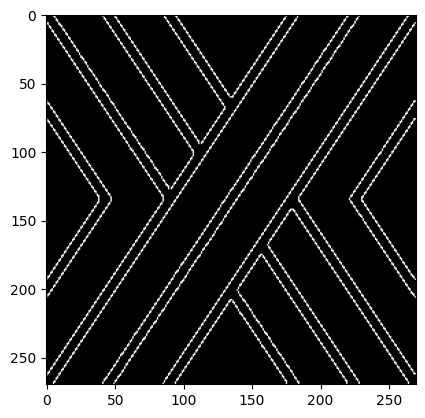

In [33]:
plt.imshow(lines_edges, cmap='gray')

In [34]:
lines = cv2.HoughLinesP(
    lines_edges,
    2,
    np.pi / 180,
    30
)

In [35]:
len(lines)

299

In [36]:
result_lines_img = cv2.cvtColor(lines_img, cv2.COLOR_GRAY2RGB)

In [37]:
for line in lines:
  x0, y0, x1, y1 = line[0]
  cv2.line(result_lines_img, (x0, y0), (x1, y1), (0, 255, 0), 5)

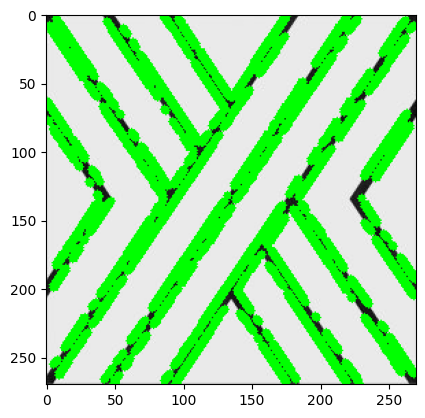

In [38]:
plt.imshow(result_lines_img)

### Detekcja okręgów

Do detekcji okręgów za pomocą modyfikacji transformaty Hougha przeznaczona jest funkcja **HoughCircles**, która przyjmuje następujące parametry:
- method - placeholder dla kolejnych modyfikacji (w tym momencie dostępna jest tylko jedna)
- dp - odwrotny współczynik rozdzielczości kontenera na głosy
- minDist - minimalna odległość między środkami okręgów, przy małej wartości może występować wiele fałszywych detekcji
- minRadius - minimalny promień wykrytego okręgu
- maxRadius - maksymalny promień wykrytego okręgu

In [39]:
checkers_img = cv2.imread('checkers.png')
checkers_gray = cv2.cvtColor(checkers_img, cv2.COLOR_BGR2GRAY)
checkers_color = cv2.cvtColor(checkers_img, cv2.COLOR_BGR2RGB)

In [40]:
circles = cv2.HoughCircles(
    checkers_gray,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=60,
    minRadius=20,
    maxRadius=100
)

In [41]:
len(circles[0])

24

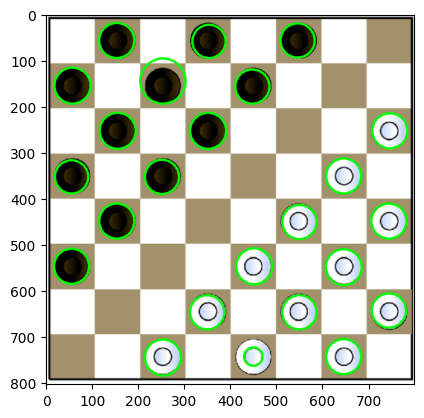

In [42]:
for (x, y, r) in circles.astype(int)[0]:
  cv2.circle(checkers_color, (x, y), r, (0, 255, 0), 4)

plt.imshow(checkers_color)

## Zadania

Ostatnim Państwa zadaniem będzie dodanie metod, w rozwijanej od kilku miesięcy bibliotece. Każda metoda będzie dotyczyła zaprezentowanej funkcjonalności OpenCV, czyli będzie miała za zadanie wywołanie "pod spodem" danej funkcjonalności z OpenCV, a następnie zwrocenie wyniku. Rozkład i sens przygotowywanych metod zostawiam Państwu do przemyślenia.

Przykładowe metody mogą wyglądać następująco:
- otsu() -> BaseImage - w klasie Thresholding
- clahe() -> BaseImage - w klasie ImageAligning
- canny(th0: int, th1: int, kernel_size: int) -> BaseImage - w nowo utworzonej klasie EdgeDetection